## Pima Diabetes Prediction Using ANN With PyTorch Library

In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
http://localhost:8888/notebooks/AI_course/Krish%20naik%20playlist/Diabetes%20Prediction%20Pima%20indians%20diabetes%20database/Pima%20Diabetes%20Prediction%20Using%20ANN%20With%20PyTorch%20Library.ipynb#Pima-Diabetes-Prediction-Using-ANN-With-PyTorch-Librarydf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import seaborn as sns


In [6]:
#df['Outcome']= np.where(df['Outcome']==1, "Diabetic", "No diabetic")
#df.head()

In [7]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## creating model

In [8]:

X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [12]:
df.shape

(768, 9)

In [13]:

#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [14]:

####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [15]:

model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [16]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:

epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019211292266846
Epoch number: 21 and the loss : 0.6090322732925415
Epoch number: 31 and the loss : 0.5917771458625793
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529040694236755
Epoch number: 61 and the loss : 0.5410095453262329
Epoch number: 71 and the loss : 0.5310391783714294
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135969519615173
Epoch number: 101 and the loss : 0.5061253905296326
Epoch number: 111 and the loss : 0.4983411729335785
Epoch number: 121 and the loss : 0.49605482816696167
Epoch number: 131 and the loss : 0.4828636944293976
Epoch number: 141 and the loss : 0.4756038784980774
Epoch number: 151 and the loss : 0.48334670066833496
Epoch number: 161 and the loss : 0.48827359080314636
Epoch number: 171 and the loss : 0.46933713555336
Epoch number: 181 and the loss : 0.4662608206272125
Epoch number: 191 and t

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Epoch vs Loss')

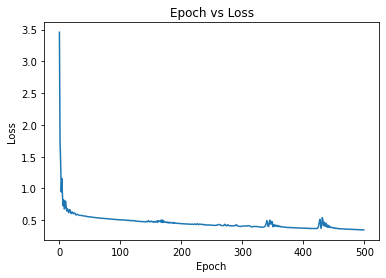

In [19]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Epoch vs Loss")

In [20]:
##predictions

predictions=[]
with torch.no_grad():  #to avoid gradeients
    for i, data in enumerate(X_test):
        y_pred=model(data)
        #print(model(data))
        predictions.append(y_pred.argmax().item())   #index 1 means diabetic person, 0-- non diabetic
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [21]:
# comparison with x_test

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)
cm

array([[91, 16],
       [17, 30]], dtype=int64)

Text(69.0, 0.5, 'Predicted')

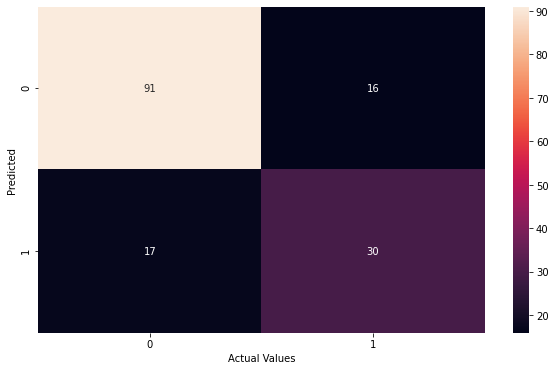

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted")

In [23]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test, predictions)
score

0.7857142857142857

In [24]:
##to save model
torch.save(model, 'diabetes.pt')

In [25]:
model= torch.load("diabetes.pt")

In [26]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [27]:
## predictions of new data points
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [28]:
lst1=[377.0, 368.0, 72.0, 35.0, 78.0, 33.6, 70.627, 50.0]

In [29]:
new_data=torch.tensor(lst1)

In [30]:
##predcting for new datapoints

with torch.no_grad():  #to avoid gradeients
    for i, data in enumerate(X_test):
        print(model(new_data))
        

tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.5484, -33.8844])
tensor([ 26.54